<img src='logo/dsl-logo.png' width="500" align="center" />

# HR Competition

## Gradient Boost Model

### Initializations

In [1]:
# benötigte Bibliotheken einbinden
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import learning_curve
%matplotlib inline

In [2]:
# Definition einer Klasse für Text Styles
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [4]:
# Laden der Trainings- und Testdaten
X = np.load(file='exchange/hr_06_X.npy')
X_train = np.load(file='exchange/hr_06_X_train.npy')
X_train_scaled = np.load(file='exchange/hr_06_X_train_scaled.npy')
X_test = np.load(file='exchange/hr_06_X_test.npy')
X_test_scaled = np.load(file='exchange/hr_06_X_test_scaled.npy')
y = np.load(file='exchange/hr_06_y.npy')
y_train = np.load(file='exchange/hr_06_y_train.npy')
y_test = np.load(file='exchange/hr_06_y_test.npy')

In [5]:
# Definition der Learning Curve-Methode
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

### Use Gradient Boost

In [7]:
# Gradient Boost initialisieren
clf = GradientBoostingClassifier()

In [8]:
clf.fit(X_train_scaled, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [9]:
# Score berechnen
clf.score(X_test_scaled, y_test)

0.97083333333333333

In [10]:
# Confusion Matrix und Classification Report erstellen
predictions = clf.predict(X_test_scaled)

In [12]:
print(confusion_matrix(y_test, predictions))

[[1822   25]
 [  45  508]]


In [13]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.98      0.99      0.98      1847
          1       0.95      0.92      0.94       553

avg / total       0.97      0.97      0.97      2400



In [11]:
# Train und Test Accuracy ausgeben
print("Train Accuracy :: ", accuracy_score(y_train, clf.predict(X_train_scaled)))
print("Test Accuracy  :: ", accuracy_score(y_test, predictions))

Train Accuracy ::  0.978122721117
Test Accuracy  ::  0.970833333333


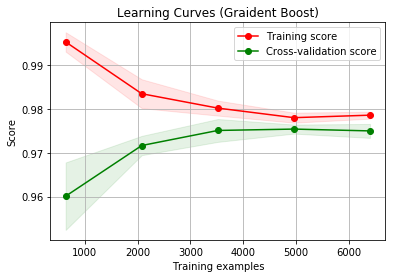

In [14]:
# Learning Curve berechnen
title = 'Learning Curves (Graident Boost)'
estimator = clf
plot_learning_curve(estimator, title, X_train_scaled, y_train)
plt.show()

### Hyperparameter Tuning Using GridSearchCV

In [110]:
# weitere Bibliothek importieren
from sklearn.model_selection import GridSearchCV

In [111]:
# Laden der Trainings- und Testdaten
X = np.load(file='exchange/hr_06_X.npy')
X_train = np.load(file='exchange/hr_06_X_train.npy')
X_train_scaled = np.load(file='exchange/hr_06_X_train_scaled.npy')
X_test = np.load(file='exchange/hr_06_X_test.npy')
X_test_scaled = np.load(file='exchange/hr_06_X_test_scaled.npy')
y = np.load(file='exchange/hr_06_y.npy')
y_train = np.load(file='exchange/hr_06_y_train.npy')
y_test = np.load(file='exchange/hr_06_y_test.npy')

In [112]:
# Gradient Boost initialisieren
clf = GradientBoostingClassifier()

In [113]:
param_space = {'n_estimators':[1000,1500,2000], 'max_depth':[7,9,11], 'learning_rate':[0.05,0.1]}

In [114]:
# Grid Search Crossvalidation definieren 
gs = GridSearchCV(clf, param_space, cv=10, n_jobs=-1)

In [115]:
# Modelle erstellen
gs.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [1000, 1500, 2000], 'max_depth': [7, 9, 11], 'learning_rate': [0.05, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

/Users/chris/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


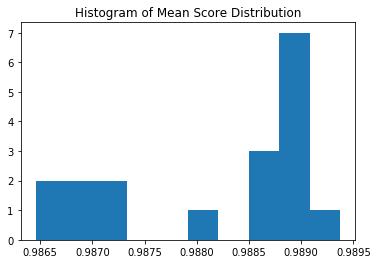

In [116]:
# Histogramm erstellen
scores = pd.DataFrame(gs.grid_scores_)
plt.hist(scores['mean_validation_score'], bins=10)
plt.title('Histogram of Mean Score Distribution');

In [117]:
# besten Modellscore ausgeben
gs.best_score_

0.98937389311386603

In [118]:
# beste Parameterkombination ausgeben
gs.best_params_

{'learning_rate': 0.05, 'max_depth': 9, 'n_estimators': 1500}

In [119]:
# Gradient Boost mit bester Parameterkombination initialisieren
clf = GradientBoostingClassifier(max_depth=9, n_estimators=1500, learning_rate=0.05)

In [121]:
clf.fit(X_train_scaled, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=9,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1500,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [122]:
# Score ausgeben
clf.score(X_test_scaled, y_test)

0.99083333333333334

In [123]:
# Confusion Matrix erstellen
predictions = clf.predict(X_test_scaled)

In [125]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[1842    5]
 [  17  536]]


In [124]:
# Train und Test Accuracy ausgeben
print("Train Accuracy :: ", accuracy_score(y_train, clf.predict(X_train_scaled)))
print("Test Accuracy  :: ", accuracy_score(y_test, predictions))

Train Accuracy ::  1.0
Test Accuracy  ::  0.990833333333


In [87]:
# Laden der Dictionary-Datei
cm_dict = np.load("exchange/hr_20_cm_dict.npy")
print(cm_dict.item())

{'neural_net': {'cm': array([[1809,   38],
       [  22,  531]]), 'label': 'Neural Network'}, 'random_forest': {'cm': array([[1844,    3],
       [  18,  535]]), 'label': 'Random Forest'}, 'logistic_regression': {'cm': array([[1738,  109],
       [ 352,  201]]), 'label': 'Logistic Regression'}, 'decision_tree': {'cm': array([[1820,   27],
       [  18,  535]]), 'label': 'Decision Tree'}, 'svm': {'cm': array([[1790,   57],
       [ 182,  371]]), 'label': 'Support Vector Machine'}, 'deep_neural_net': {'cm': array([[1822,   25],
       [ 140,  413]]), 'label': 'Deep Neural Network'}, 'nearest_neighbor': {'cm': array([[1831,   16],
       [  20,  533]]), 'label': 'Nearest Neighbor'}, 'gradient_boost': {'cm': array([[1842,    5],
       [  17,  536]]), 'label': 'Gradient Boost'}}


In [88]:
# Aktualisieren der Werte der Confusion Matrix und exportieren der Ergebnisse
cm_dict.item().update({'gradient_boost':{'cm': cm, 'label': 'Gradient Boost' }})
print(cm_dict)
np.save("exchange/hr_20_cm_dict.npy", cm_dict)

{'neural_net': {'cm': array([[1809,   38],
       [  22,  531]]), 'label': 'Neural Network'}, 'random_forest': {'cm': array([[1844,    3],
       [  18,  535]]), 'label': 'Random Forest'}, 'logistic_regression': {'cm': array([[1738,  109],
       [ 352,  201]]), 'label': 'Logistic Regression'}, 'decision_tree': {'cm': array([[1820,   27],
       [  18,  535]]), 'label': 'Decision Tree'}, 'svm': {'cm': array([[1790,   57],
       [ 182,  371]]), 'label': 'Support Vector Machine'}, 'deep_neural_net': {'cm': array([[1822,   25],
       [ 140,  413]]), 'label': 'Deep Neural Network'}, 'nearest_neighbor': {'cm': array([[1831,   16],
       [  20,  533]]), 'label': 'Nearest Neighbor'}, 'gradient_boost': {'cm': array([[1841,    6],
       [  17,  536]]), 'label': 'Gradient Boost'}}


In [89]:
# Classification Report erstellen
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99      1847
          1       0.99      0.97      0.98       553

avg / total       0.99      0.99      0.99      2400



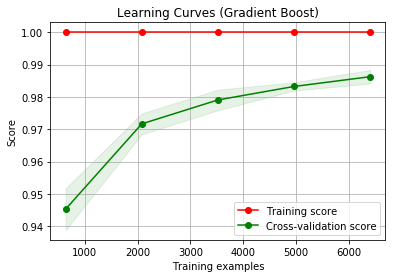

In [90]:
# Learning Curve berechnen
title = 'Learning Curves (Gradient Boost)'
estimator = clf
plot_learning_curve(estimator, title, X_train_scaled, y_train)
plt.show()

### Feature Selection for Gradient Boost

In [11]:
# weitere Bibliotheken importieren
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from IPython.display import clear_output
import itertools as it

In [12]:
dff = pd.read_pickle('exchange/hr_01_cleaned_train.pkl')
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
satisfactionLevel       10000 non-null float64
yearsSinceEvaluation    10000 non-null float64
numberOfProjects        10000 non-null int64
averageMonthlyHours     10000 non-null int64
yearsAtCompany          10000 non-null int64
workAccident            10000 non-null category
hasLeftCompany          10000 non-null category
gotPromotion            10000 non-null category
department              10000 non-null category
salary                  10000 non-null category
dtypes: category(5), float64(2), int64(3)
memory usage: 439.7 KB


In [13]:
# Datentyp von Category in Object umwandeln
for col in dff.select_dtypes(['category']):
    print('transforming', col)
    dff[col] = dff[col].astype('str')

transforming workAccident
transforming hasLeftCompany
transforming gotPromotion
transforming department
transforming salary


In [14]:
# Features in List umwandeln und ausgeben
columns = list(dff.columns)
columns.remove('hasLeftCompany')
columns

['satisfactionLevel',
 'yearsSinceEvaluation',
 'numberOfProjects',
 'averageMonthlyHours',
 'yearsAtCompany',
 'workAccident',
 'gotPromotion',
 'department',
 'salary']

In [15]:
# Länge der Liste
len(columns)

9

In [16]:
# Anzahl der Kombinationen, wenn 0, 1, 2 oder 3 Features rausnimmt
for i in range(0,4):
    print(len(set(it.combinations(columns,i))))

1
9
36
84


In [17]:
# Kombination der Features, die nicht berücksichtigt werden und Ausgabe der Scores 
results = pd.DataFrame([], columns=['combination', 'score'])
for i in range(0,4):
    combinations = set(it.combinations(columns,i))
    for idx, comb in enumerate(combinations):
        print()
        print('calculating... combinations with ' + str(i) + ' elements :: ' + str(idx + 1) + ' of ' + str(len(combinations)))
        comb = list(comb)
        comb.append('hasLeftCompany')
        df = pd.get_dummies(dff.drop(comb, axis=1)).join(dff[['hasLeftCompany']])
        y = df['hasLeftCompany'].values
        X = df.drop(['hasLeftCompany'], axis=1).values
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        scaler = MinMaxScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        clf = GradientBoostingClassifier(max_depth=9, n_estimators=1500, learning_rate=0.05)
        scores = cross_val_score(clf, X_train_scaled, y_train, cv=10, n_jobs=-1)
        results = results.append(pd.DataFrame([[','.join(comb), scores.mean()]], columns=results.columns))
        clear_output()
        print(color.BOLD + 'best scores so far:' + color.END)
        print(results.sort_values('score', ascending=False).head(5))

best scores so far:
                                       combination     score
0           workAccident,department,hasLeftCompany  0.986000
0           gotPromotion,department,hasLeftCompany  0.985999
0                      workAccident,hasLeftCompany  0.985874
0                      gotPromotion,hasLeftCompany  0.985874
0  workAccident,gotPromotion,salary,hasLeftCompany  0.985750


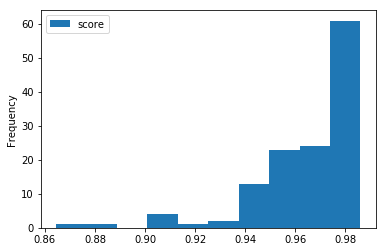

In [18]:
# Ausgabe der Scores als Diagramm
results.plot.hist();

In [19]:
# Ausgabe der kombinierten Features sortiert nach Score - besten Kombinationen
results.sort_values('score', ascending=False).head(10)

,combination,score
0,"workAccident,department,hasLeftCompany",0.986000
0,"gotPromotion,department,hasLeftCompany",0.985999
0,"workAccident,hasLeftCompany",0.985874
0,"gotPromotion,hasLeftCompany",0.985874
0,"workAccident,gotPromotion,salary,hasLeftCompany",0.985750
0,"workAccident,salary,hasLeftCompany",0.985750
0,"workAccident,department,salary,hasLeftCompany",0.985624
0,"workAccident,gotPromotion,hasLeftCompany",0.985500
0,hasLeftCompany,0.985374
0,"department,hasLeftCompany",0.985250


In [20]:
# Ausgabe der ignorierten kombinierten Features sortiert nach Score - schlechtesten Kombinationen
results.sort_values('score', ascending=False).tail(10)

,combination,score
0,"satisfactionLevel,yearsAtCompany,salary,hasLef...",0.945751
0,"numberOfProjects,averageMonthlyHours,yearsAtCo...",0.933627
0,"yearsSinceEvaluation,numberOfProjects,yearsAtC...",0.930125
0,"yearsSinceEvaluation,averageMonthlyHours,years...",0.913500
0,"satisfactionLevel,yearsSinceEvaluation,average...",0.908625
0,"satisfactionLevel,yearsSinceEvaluation,yearsAt...",0.902750
0,"satisfactionLevel,numberOfProjects,yearsAtComp...",0.902371
0,"satisfactionLevel,averageMonthlyHours,yearsAtC...",0.901747
0,"satisfactionLevel,yearsSinceEvaluation,numberO...",0.883500
0,"satisfactionLevel,numberOfProjects,averageMont...",0.864498


In [103]:
# Features mit geringem Einfluss auf Modell rausnehmen und Trainings- und Testdataframes erstellen
df = pd.get_dummies(dff.drop(['workAccident','gotPromotion', 'salary', 'hasLeftCompany'], axis=1)).join(dff[['hasLeftCompany']])
y = df['hasLeftCompany'].values
X = df.drop(['hasLeftCompany'], axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [104]:
# Gradient Boost mit bester Parameterkombination initialisieren
clf = GradientBoostingClassifier(max_depth=9, n_estimators=1000, learning_rate=0.1)

In [105]:
clf.fit(X_train_scaled, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=9,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [106]:
# Score ausgeben
clf.score(X_test_scaled, y_test)

0.98999999999999999

In [107]:
# Confusion Matrix erstellen
predictions = clf.predict(X_test_scaled)

In [109]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[1840    7]
 [  17  536]]


In [108]:
# Train und Test Accuracy ausgeben
print("Train Accuracy :: ", accuracy_score(y_train, clf.predict(X_train_scaled)))
print("Test Accuracy  :: ", accuracy_score(y_test, predictions))

Train Accuracy ::  1.0
Test Accuracy  ::  0.99


In [523]:
# Laden der Dictionary-Datei
cm_dict = np.load("exchange/hr_20_cm_dict.npy")
print(cm_dict.item())

{'neural_net': {'cm': array([[1809,   38],
       [  22,  531]]), 'label': 'Neural Network'}, 'random_forest': {'cm': array([[1841,    6],
       [  40,  513]]), 'label': 'Random Forest'}, 'logistic_regression': {'cm': array([[1738,  109],
       [ 352,  201]]), 'label': 'Logistic Regression'}, 'decision_tree': {'cm': array([[1820,   27],
       [  18,  535]]), 'label': 'Decision Tree'}, 'svm': {'cm': array([[1790,   57],
       [ 182,  371]]), 'label': 'Support Vector Machine'}, 'deep_neural_net': {'cm': array([[1822,   25],
       [ 140,  413]]), 'label': 'Deep Neural Network'}, 'nearest_neighbor': {'cm': array([[1831,   16],
       [  20,  533]]), 'label': 'Nearest Neighbor'}}


In [524]:
# Aktualisieren der Werte der Confusion Matrix und exportieren der Ergebnisse
cm_dict.item().update({'gradient_boost':{'cm': cm, 'label': 'Gradient Boost' }})
print(cm_dict)
np.save("exchange/hr_20_cm_dict.npy", cm_dict)

{'neural_net': {'cm': array([[1809,   38],
       [  22,  531]]), 'label': 'Neural Network'}, 'random_forest': {'cm': array([[1844,    3],
       [  18,  535]]), 'label': 'Random Forest'}, 'logistic_regression': {'cm': array([[1738,  109],
       [ 352,  201]]), 'label': 'Logistic Regression'}, 'decision_tree': {'cm': array([[1820,   27],
       [  18,  535]]), 'label': 'Decision Tree'}, 'svm': {'cm': array([[1790,   57],
       [ 182,  371]]), 'label': 'Support Vector Machine'}, 'deep_neural_net': {'cm': array([[1822,   25],
       [ 140,  413]]), 'label': 'Deep Neural Network'}, 'nearest_neighbor': {'cm': array([[1831,   16],
       [  20,  533]]), 'label': 'Nearest Neighbor'}}


In [525]:
# Classification Report erstellen
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99      1847
          1       0.99      0.97      0.98       553

avg / total       0.99      0.99      0.99      2400



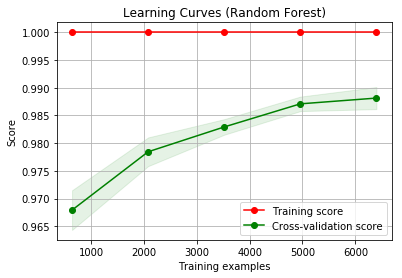

In [526]:
# Learning Curve berechnen
title = 'Learning Curves (Gradient Boost)'
estimator = clf
plot_learning_curve(estimator, title, X_train_scaled, y_train)
plt.show()